# Load Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC
from tensorflow.keras.models import Sequential, load_model, save_model

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split



import numpy as np

import pandas as pd

image_path = "dataset_train/dataset/"

import warnings
warnings.filterwarnings('ignore')

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Reading Data

https://github.com/radenjezic153/Stat_ML/blob/master/project.ipynb

https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf

In [3]:
# tf.test.gpu_device_name()
# !unzip dataset.zip
# !unzip dataset_test.zip

20000 20000
Train -> 24000 [60.0%] 
Val   -> 8000 [20.0%] 
Test  -> 8000 [20.0%] 


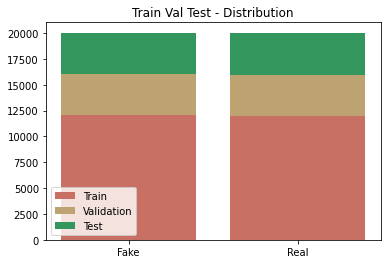

In [4]:
def loadDataSet(path):
    def loadImages(path):
        # literalmente dar load das imagens todas para estes arrays
        # Listas por compreencao for life <3
        real = [image.load_img(image_path+"real/"+file,target_size = (28,28), color_mode='grayscale') for file in os.listdir(image_path+"real/")]
        fake = [image.load_img(image_path+"fake/"+file,target_size = (28,28), color_mode='grayscale') for file in os.listdir(image_path+"fake/")]
        return real,fake

    def imagesToArray(imgs):
        return np.array([image.img_to_array(img)[:,:,0] for img in imgs])
    
    real,fake = loadImages(path)
    real_array = imagesToArray(real)
    fake_array = imagesToArray(fake)
    return real_array,fake_array
  
real,fake = loadDataSet(image_path)
print(len(real),len(fake))

X = np.append(real,fake,axis=0)
y = np.append(np.ones((20000,1)),np.zeros((20000,1)))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=13)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=13)
print("Train -> {} [{}%] ".format(len(y_train),len(y_train)/40000*100))
print("Val   -> {} [{}%] ".format(len(y_val),len(y_val)/40000*100))
print("Test  -> {} [{}%] ".format(len(y_test),len(y_test)/40000*100))


_, frequency_train = np.unique(y_train, return_counts = True)
_, frequency_val = np.unique(y_val, return_counts = True)
_, frequency_test = np.unique(y_test, return_counts = True)

plt.bar(["Fake","Real"], frequency_train,label ='Train',color="#C97064")
plt.bar(["Fake","Real"], frequency_val,label ='Validation',color="#BCA371",bottom=frequency_train)
plt.bar(["Fake","Real"], frequency_test,label ='Test',color="#32965D",bottom=np.add(frequency_train, frequency_test))
plt.legend()
plt.title("Train Val Test - Distribution")
plt.show()

X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# CNN Testing parameters

In [5]:
act = ['relu', 'softmax', 'sigmoid', 'tanh']

import itertools
  
# Get all combinations of [1, 2, 3] and length 2 
comb = itertools.product(act, repeat=2)
  
# print(len(list(comb)))
# Print the obtained combinations 
for i in list(comb): 
    print(i) 

('relu', 'relu')
('relu', 'softmax')
('relu', 'sigmoid')
('relu', 'tanh')
('softmax', 'relu')
('softmax', 'softmax')
('softmax', 'sigmoid')
('softmax', 'tanh')
('sigmoid', 'relu')
('sigmoid', 'softmax')
('sigmoid', 'sigmoid')
('sigmoid', 'tanh')
('tanh', 'relu')
('tanh', 'softmax')
('tanh', 'sigmoid')
('tanh', 'tanh')


Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.9346 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 2/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 3/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4985
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 7/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4985

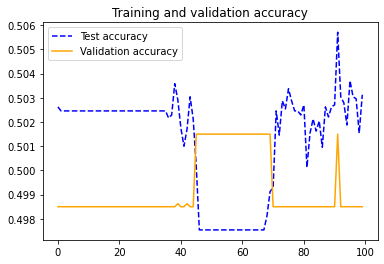

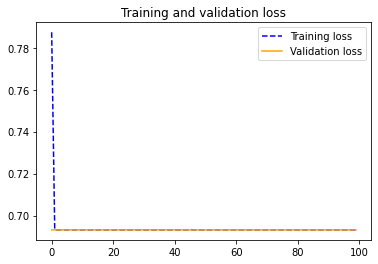

INFO:tensorflow:Assets written to: tanh_tanh_0.5/model_drop0.5_epochs100_act-tanh_tanh/assets
--------------------------------------------------------- FIM -------------------------------------------------------
Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.7090 - accuracy: 0.5041 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 2/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 3/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss

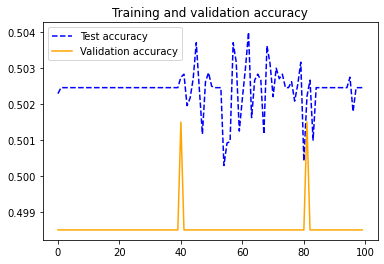

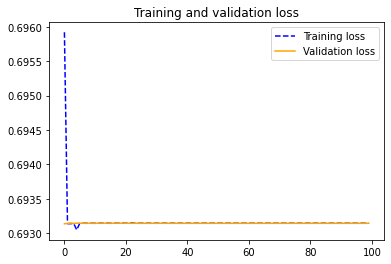

INFO:tensorflow:Assets written to: tanh_tanh_0.6/model_drop0.6_epochs100_act-tanh_tanh/assets
--------------------------------------------------------- FIM -------------------------------------------------------
Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6981 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 2/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 3/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6931 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss

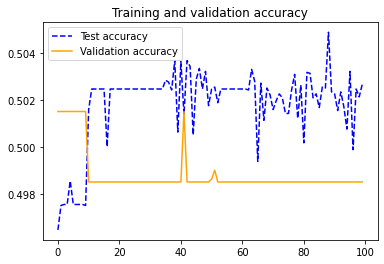

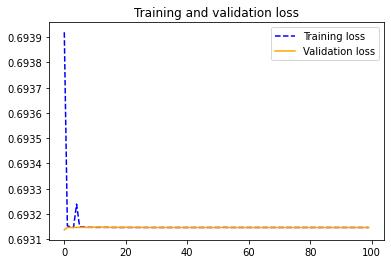

INFO:tensorflow:Assets written to: tanh_tanh_0.7/model_drop0.7_epochs100_act-tanh_tanh/assets
--------------------------------------------------------- FIM -------------------------------------------------------
Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 0.7025 - accuracy: 0.5089 - val_loss: 0.6367 - val_accuracy: 0.5270
Epoch 2/100
750/750 [==============================] - 5s 6ms/step - loss: 0.5869 - accuracy: 0.6321 - val_loss: 0.4332 - val_accuracy: 0.7911
Epoch 3/100
750/750 [==============================] - 5s 6ms/step - loss: 0.4318 - accuracy: 0.7950 - val_loss: 0.3447 - val_accuracy: 0.8664
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3821 - accuracy: 0.8288 - val_loss: 0.3645 - val_accuracy: 0.8407
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3663 - accuracy: 0.8396 - val_loss: 0.3732 - val_accuracy: 0.8365
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss

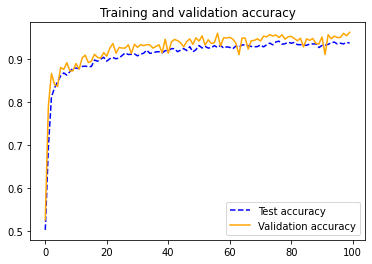

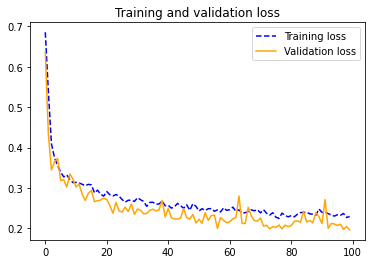

INFO:tensorflow:Assets written to: tanh_tanh_0.8/model_drop0.8_epochs100_act-tanh_tanh/assets
--------------------------------------------------------- FIM -------------------------------------------------------


In [15]:
# ('relu', 'relu') / ('relu', 'softmax') / ('relu', 'sigmoid') / ('relu', 'tanh') ====== T / T / T / T
# ('softmax', 'relu') / ('softmax', 'softmax') / ('softmax', 'sigmoid') / ('softmax', 'tanh') ===== T / T com pred / T com pred / T com pred
# ('sigmoid', 'relu') / ('sigmoid', 'softmax') / ('sigmoid', 'sigmoid') / ('sigmoid', 'tanh') ===== T / T / T / T (tudo com pred)
# ('tanh', 'relu') / ('tanh', 'softmax') / ('tanh', 'sigmoid') / ('tanh', 'tanh') ===== T / T / T / T (tudo com pred)

acts_1 = ['relu', 'softmax', 'sigmoid', 'tanh']
acts_2 = ['relu', 'softmax', 'sigmoid', 'tanh']
dropouts = [0.5, 0.6, 0.7, 0.8]

for act_1 in acts_1:
    for act_2 in acts_2:
        for dropout in dropouts:
            cnn_model = Sequential()
            cnn_model.add(Conv2D(128, kernel_size=3, activation=act_1, input_shape=(28,28,1)))
            cnn_model.add(Conv2D(64, kernel_size=3, activation=act_1))
            cnn_model.add(Conv2D(32, kernel_size=3, activation=act_1))
            cnn_model.add(Dropout(dropout))
            cnn_model.add(Flatten())
            cnn_model.add(Dense(128, activation=act_1))
            cnn_model.add(Dense(2, activation=act_2))
  
            cnn_model.compile(
                optimizer="adam",
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy']
            )
   
            n_epochs = 100

            cnn_model_training = cnn_model.fit(
                X_train,
                y_train,
                epochs=n_epochs,
                validation_data=(X_val, y_val)
            )

            '''cnn_model_training = cnn_model.fit(
                train_ds,
                epochs=n_epochs,
                validation_data=validation_ds
            )'''

            cnn_accuracy     = cnn_model_training.history['accuracy']
            cnn_val_accuracy = cnn_model_training.history['val_accuracy']
            loss             = cnn_model_training.history['loss'] 
            val_loss         = cnn_model_training.history['val_loss']
            epochs = [i for i in range (n_epochs)]

            plt.plot(epochs, cnn_accuracy, 'b--', label='Training accuracy')
            plt.plot(epochs, cnn_val_accuracy, 'orange', label='Validation accuracy')
            plt.title('Training and validation accuracy')
            plt.savefig(f'{act_1}_{act_2}_{dropout}/Accuracy values - drop{dropout}_epochs{n_epochs}_act-{act_1}_{act_2}.png')
            plt.legend()
            plt.show()

            plt.figure()
            plt.plot(epochs, loss, 'b--', label = 'Training loss')
            plt.plot(epochs, val_loss, 'orange', label = 'Validation loss')
            plt.title('Training and validation loss')
            plt.legend()
            plt.savefig(f'{act_1}_{act_2}_{dropout}/Loss values - drop{dropout}_epochs{n_epochs}_act-{act_1}_{act_2}.png')
            plt.show()

            predictions = cnn_model.predict(X_val)
            pd.DataFrame(predictions).to_csv(f'{act_1}_{act_2}_{dropout}/model_drop{dropout}_epochs{n_epochs}_act-{act_1}_{act_2}.csv', index=False)

            tf.keras.models.save_model(cnn_model, f'{act_1}_{act_2}_{dropout}/model_drop{dropout}_epochs{n_epochs}_act-{act_1}_{act_2}')
            print("--------------------------------------------------------- FIM -------------------------------------------------------")

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
acts_1 = ['relu', 'softmax', 'sigmoid', 'tanh']
acts_2 = ['relu', 'softmax', 'sigmoid', 'tanh']
dropouts = [0.5, 0.6, 0.7, 0.8]

# relu, softmax, 0.5

colunas = ["Type", "Accuracy", "Precision", "Recall", "AUC", "F1-score"]
metricas = pd.DataFrame(columns=colunas)

for act_1 in acts_1:
    for act_2 in acts_2:
        for dropout in dropouts:
            '''cnn_model = load_model(f'C:\\Users\\tferr\\Desktop\\ACA\\Projeto\\Project_Assignment_To_Students\\To_Students\\AML-Project\\Models\\Testes\\{act_1}_{act_2}_{dropout}\\model_drop{dropout}_epochs100_act-{act_1}_{act_2}')
            predictions = cnn_model.predict(X_val)
            pd.DataFrame(predictions).to_csv(f'Models/Testes/{act_1}_{act_2}_{dropout}/model_drop{dropout}_epochs100_act-{act_1}_{act_2}.csv', index=False)
            print("--------------------", act_1, act_2, dropout, "------------------")'''
            
            '''predictions = pd.read_csv(f'Models/Testes/{act_1}_{act_2}_{dropout}/model_drop{dropout}_epochs100_act-{act_1}_{act_2}.csv')
            predictions["Category"] = predictions.idxmax(axis=1)
            predictions = predictions.drop(columns=["0", "1"])
            predictions.to_csv(f'Models/Testes/{act_1}_{act_2}_{dropout}/model_drop{dropout}_epochs100_act-{act_1}_{act_2}.csv', index=False)'''
            
            predictions = pd.read_csv(f'Models/Testes/{act_1}_{act_2}_{dropout}/model_drop{dropout}_epochs100_act-{act_1}_{act_2}.csv')
            
            aux = pd.Series(data={
                "Type": f"{act_1}_{act_2}_{dropout}",
                "Accuracy": accuracy_score(y_val, predictions["Category"]),
                "Precision": precision_score(y_val, predictions["Category"]),
                "Recall": recall_score(y_val, predictions["Category"]),
                "AUC": roc_auc_score(y_val, predictions["Category"]),
                "F1-score": f1_score(y_val, predictions["Category"]),
            })
            metricas = metricas.append(aux, ignore_index=True)

pd.set_option('display.max_rows', None)
metricas = metricas.set_index('Type')
# display(metricas)
metricas.to_csv('Models/Testes/comparison_models.csv')
metricas = metricas.sort_values("Accuracy", ascending=False)
display(metricas)

,Accuracy,Precision,Recall,AUC,F1-score
Type,,,,,
relu_softmax_0.5,0.998750,0.999501,0.998006,0.998752,0.998753
relu_sigmoid_0.5,0.998625,1.000000,0.997258,0.998629,0.998627
relu_softmax_0.6,0.998000,0.998752,0.997258,0.998002,0.998004
relu_softmax_0.8,0.994125,0.994512,0.993769,0.994126,0.994140
tanh_sigmoid_0.8,0.968875,0.974049,0.963609,0.968891,0.968801
tanh_tanh_0.8,0.959875,0.965213,0.954387,0.959892,0.959769
tanh_sigmoid_0.7,0.940500,0.901636,0.989282,0.940353,0.943428
relu_sigmoid_0.8,0.921500,0.997940,0.845214,0.921730,0.915250
relu_tanh_0.7,0.913875,0.939434,0.885344,0.913961,0.911587


# Transfer Learning (GoogleNet & VGG16)

In [15]:
# example of loading the inception v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_height = 28
img_width = 28

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.25,
    subset="training",
    image_size=(img_height, img_width),
    # interpolation='nearest',
    color_mode='grayscale',
    seed=123
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_path,
    validation_split=0.25,
    subset="validation",
    image_size=(img_height, img_width),
    color_mode='grayscale',
    # interpolation='nearest',
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset_test/dataset_test/",
    image_size=(img_height, img_width),
    color_mode='grayscale',
)

# print(train_ds.class_names)

SyntaxError: invalid syntax (<ipython-input-15-762e7223a45b>, line 27)

In [ ]:
'''cnn_model = Sequential()
cnn_model.add(Conv2D(28, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D())
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(1, activation='sigmoid'))'''

# InceptionV3 (aka GoogleNet) - 75
'''cnn_model = tf.keras.applications.InceptionV3(
    include_top=True,
    weights=None,
    input_shape=(img_height, img_width, 3),
    pooling=None,
    classes=1,
    classifier_activation="softmax",
)'''

# VGG 16 - 32
'''cnn_model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    pooling=None,
    classes=1,
    classifier_activation="softmax",
)'''

# PL6.2
'''cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# summarize the model
cnn_model.summary()

n_epochs = 100

cnn_model_training = cnn_model.fit(
    train_ds,
    epochs=n_epochs,
    validation_data=validation_ds
)

cnn_accuracy     = cnn_model_training.history['accuracy']
cnn_val_accuracy = cnn_model_training.history['val_accuracy']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (n_epochs)]

plt.plot(epochs, cnn_accuracy, 'b--', label='Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig(f'Accuracy values Model Tiago - {n_epochs} epochs')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(f'Loss values Model Tiago - {n_epochs} epochs')
plt.show()

predictions = cnn_model.predict(test_ds)
print(predictions)'''

# Create submission file for Kaggle

In [39]:
act_1 = 'relu'
act_2 = 'softmax'
dropout = 0.5
cnn_model = load_model(f'C:\\Users\\tferr\\Desktop\\ACA\\Projeto\\Project_Assignment_To_Students\\To_Students\\AML-Project\\Models\\Testes\\{act_1}_{act_2}_{dropout}\\model_drop{dropout}_epochs100_act-{act_1}_{act_2}')
preds = cnn_model.predict(test_ds)
# print(predictions)
preds = pd.DataFrame(preds)
preds["Category"] = preds.idxmax(axis=1)
preds = preds.drop(columns=[0, 1])

In [45]:
ids = np.array([img.split(".")[0] for img in sorted(os.listdir("dataset_test/dataset_test/images"))])
ids = np.reshape(ids, (len(ids), 1))
predictions = np.array(preds["Category"])#predictions.astype(int)
ids = ids.astype(int)
predictions = np.reshape(predictions, (len(predictions), 1))
dados = np.concatenate((ids, predictions), axis=1)
submition = pd.DataFrame(dados, columns= ["Id", "Category"])
submition = submition.sort_values("Id")
submition.to_csv(f"{act_1}_{act_2}_{dropout}_submition.csv", index=False)
submition = submition.set_index("Id")
display(submition)

,Category
Id,
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,1
8,1
